Fernando Pocino Martín 4ºIngeniería Biomédica


# Enunciado

Bienvenidos a la Actividad 1, donde pondremos en práctica todo lo aprendido durante el bloque 2. Esta actividad la realizaremos en clase, se terminará en casa (debería completarse en clase) y se entregará el día *8 de octubre*.

## ¿En qué consiste?

Vamos a poner en práctica cuatro aspectos del procesamiento de imágenes:
- Lectura de imagen y conversión a escala de grises
- _Umbralización_ de una imagen siguiendo los métodos vistos en clase (y comparándolos)
- _Morfología matemática_ con los operadores conocidos
- _Detección y medida de objetos_ dentro de la imagen. Este último aspecto lo veremos más adelante en el curso, con lo cual, lo que haremos aquí será sencillo y guiado (pero requerirá un esfuerzo pequeño para enfrentaros a un problema que no habéis visto antes)

La finalidad es sencilla. Se os dará una imagen, a color, que tiene varias tonalidades y que está pintada con círculos.

**La actividad consiste en contar el número de círculos de la imagen.**
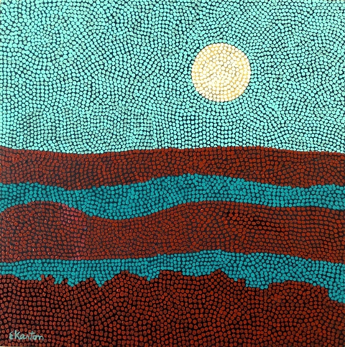

## Evaluación

Se evaluará de la siguiente manera:
- 0 puntos si no se presenta o si sólo se presenta el enunciado con modificaciones mínimas o si el ejercicio no resuelve el problema.
- 5 puntos si se presenta únicamente la resolución del ejercicio (en este caso un proceso que calcule el número de puntos), pero no se justifica los pasos realizados o no se comentan los resultados (comparación entre umbralizaciones, por ejemplo).
- 5-10 puntos, dependiendo de los comentarios realizados y de la profundidad de las explicaciones.

## Formato de entrega
- Se pide entregar el ejercicio de dos maneras:
-- En formato .py (con el código puro)
-- En formato .html

No se aceptará el formato .ipynb
Habilitaré una actividad en Canvas para que podáis subir ambos archivos.

# Inicialización

En primer lugar, cargamos todos los paquetes/frameworks que nos van a hacer falta. Se recomienda visitar la web: https://scikit-image.org/ para ver todas las funcionalidades que permite Scikit Image.

In [ ]:
# Paquetes necesarios para la realización de esta práctica (no son necesarios conocerlos ni entenderlos por ahora)
from skimage.io import imread
from skimage import transform as tf

import matplotlib.pyplot as plt

# Cargamos la función para convertir de RGB a Escala de grises
from skimage.color import rgb2gray

In [ ]:
# Paquete y funciones para realizar una umbralización con Scikit-image
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola #threshold_local=umbral adaptativa


# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Estas dos funciones nos sirven para detectar los objetos dentro de una imagen binaria
from skimage.morphology import label
from skimage.measure import regionprops

In [ ]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img, title):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(title)
    plt.show()

## Cargar la imagen

Lo primero de todo, vamos a leer la imagen. Recuerda que hay que subir la imagen cada vez que _inicies sesión_ en el notebook y que la ruta se mira haciendo botón derecho sobre el archivo.

Con lo cual, aquí vamos a hacer dos cosas:
- Cargar la imagen
- Convertirla a escala de grises

Hacemos esto para luego posteriormente umbralizar la imagen en escala de grises.

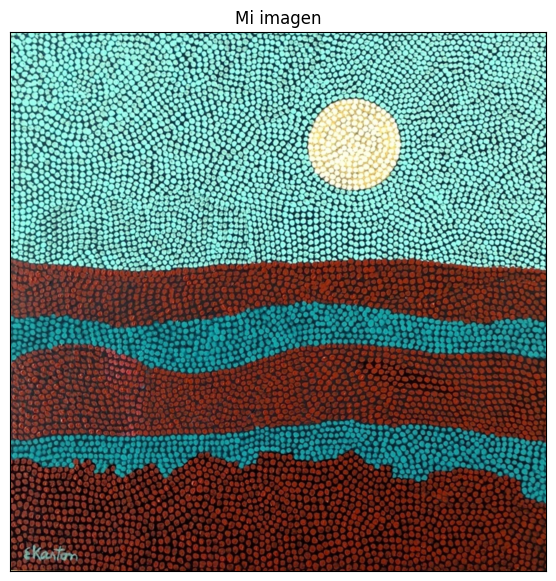

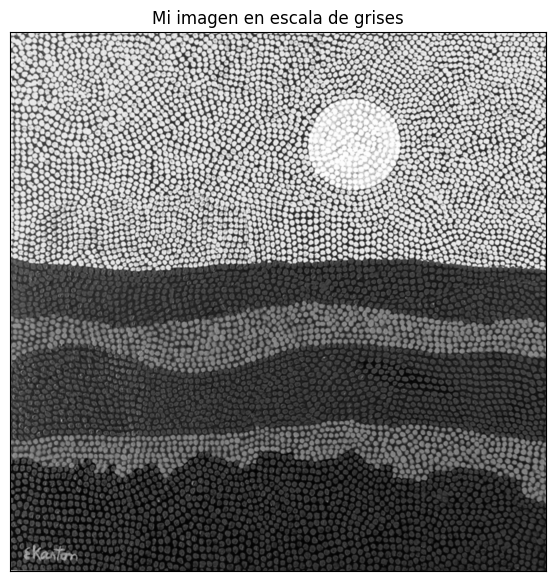

In [ ]:
# Os tendría que ir quedando una cosa así
from google.colab import files
from matplotlib import pyplot as plt
# Cargar la imagen
image_path = imread('Pintura_Puntos.jpg')
imshow(image_path,"Mi imagen")
grayscale_image = rgb2gray(image_path)
imshow(grayscale_image, 'Mi imagen en escala de grises')
 #Cuando pongo lo de quitar los "axis" me da  en la imagen que está en blanco y negro, entonces lo he dejado así.


## Umbralizar la imagen con varios métodos

Vamos a probar ahora diferentes métodos para umbralizar la imagen. Se pide en esta actividad:
- Ejecutar cada método (para ello tendréis que ver en la documentación cómo invocarlo y qué parámetros necesita)
- Mostrar por pantalla el resultado de cada imagen, añadiendo una explicación de a qué corresponde cada imagen
- Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...)
- Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola
- Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?

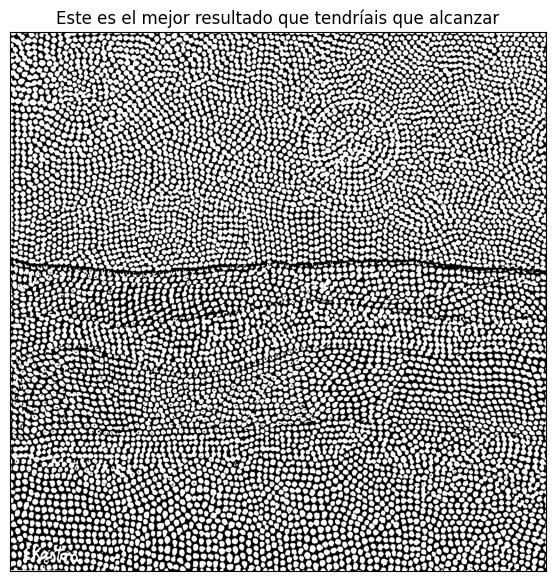

In [ ]:
# Este es el mejor resultado que tendríais que alcanzar

Ejecutar cada método (para ello tendréis que ver en la documentación cómo invocarlo y qué parámetros necesita)
Mostrar por pantalla el resultado de cada imagen, añadiendo una explicación de a qué corresponde cada imagen

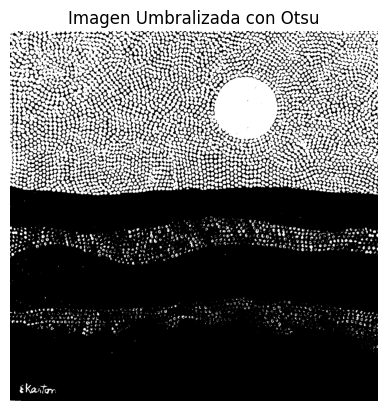

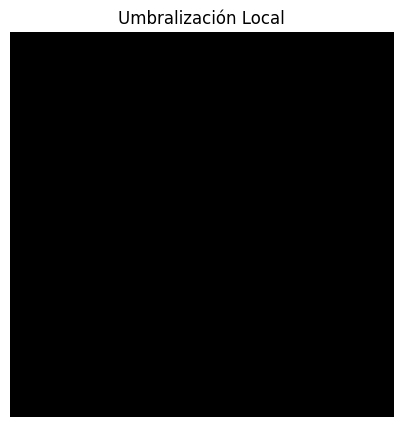

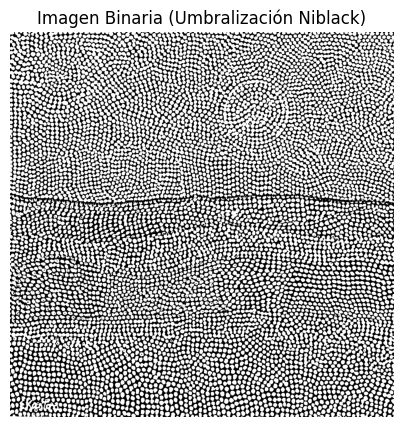

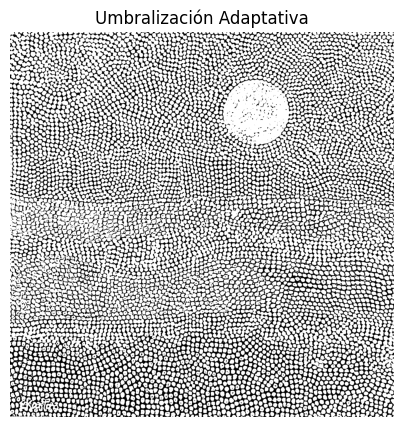

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

#Threshold_Otsu
# Cargar la imagen en escala de grises
image_path = 'Pintura_Puntos.jpg'  # Reemplaza con la ruta de tu imagen
image = imread(image_path, as_gray=True)
# Calcular el umbral de Otsu
thresh = threshold_otsu(image)
# Umbralizar la imagen
binary_image = image > thresh
# Mostrar la imagen umbralizada
plt.imshow(binary_image, cmap='gray')
plt.title("Imagen Umbralizada con Otsu")
plt.axis('off')
plt.show()


#Threshold_local o adaptativo
# Cargar la imagen desde una URL o tu computadora
image_url = "Pintura_Puntos.jpg"  # Cambia esto a la URL de tu imagen o la ruta de tu imagen local
image = io.imread(image_url)  # Para cargar desde una URL
# Si estás cargando desde tu computadora, puedes usar io.imread("nombre_de_la_imagen.jpg")

# Convierte la imagen a escala de grises si no lo está
if len(image.shape) == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Aplicar umbralización local (threshold_local)
block_size = 35  # Tamaño del bloque
binary_image = filters.threshold_local(gray_image, block_size, offset=10)

# Mostrar la imagen original y la imagen binaria
plt.figure(figsize=(10, 5))
plt.title('Umbralización Local')
plt.imshow(gray_image > binary_image, cmap='gray')
plt.axis('off')

plt.show()

#Threshold_niblack
# Cargar la imagen desde una URL o tu computadora
image_url = "Pintura_Puntos.jpg"  # Cambia esto a la URL de tu imagen o la ruta de tu imagen local
image = io.imread(image_url)  # Para cargar desde una URL
# Si estás cargando desde tu computadora, puedes usar io.imread("nombre_de_la_imagen.jpg")

# Convierte la imagen a escala de grises si no lo está
if len(image.shape) == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Aplicar umbralización local (threshold_niblack)
window_size = 35  # Tamaño de la ventana
binary_image = filters.threshold_niblack(gray_image, window_size=window_size)

# Mostrar la imagen original y la imagen binaria
plt.figure(figsize=(10, 5))
niblack=gray_image > binary_image
plt.title('Imagen Binaria (Umbralización Niblack)')
plt.imshow(niblack, cmap='gray')
plt.axis('off')

plt.show()

#Threshold_sauvola
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Cargar la imagen desde una URL o tu computadora
image_url = "Pintura_Puntos.jpg"  # Cambia esto a la URL de tu imagen o la ruta de tu imagen local
image = io.imread(image_url)  # Para cargar desde una URL
# Si estás cargando desde tu computadora, puedes usar io.imread("nombre_de_la_imagen.jpg")

# Convierte la imagen a escala de grises si no lo está
if len(image.shape) == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Aplica la umbralización adaptativa utilizando el método de Sauvola
thresholded_image = filters.threshold_sauvola(gray_image)

# Muestra la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.title('Umbralización Adaptativa')
plt.imshow(gray_image > thresholded_image, cmap='gray')
plt.axis('off')

plt.show()



**Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...)**


El Threshold Otsu funciona bien en imágenes con bimodalidad, Threshold Local es útil para iluminación variable y tanto el Threshold Niblack como el Sauvola se adaptan a la variación local de intensidad.



**Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola**

Threshold Niblack y Threshold Sauvola, ambos son métodos de umbralización local adaptativa que consideran la variación local de intensidad para determinar umbrales.

**Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?**

La rotación de 180 grados afecta los resultados de umbralización, ya que cambia la distribución de intensidades invertiendo las regiones previamente claras y oscuras en la imagen. Por ello, los métodos locales pueden verse más afectados debido a la variación local de intensidad.
Se puede observar que los resultados obtenidos difieren mucho al rotar la imagen 180º por lo que se puede decir que no se obtiene el mismo resultado

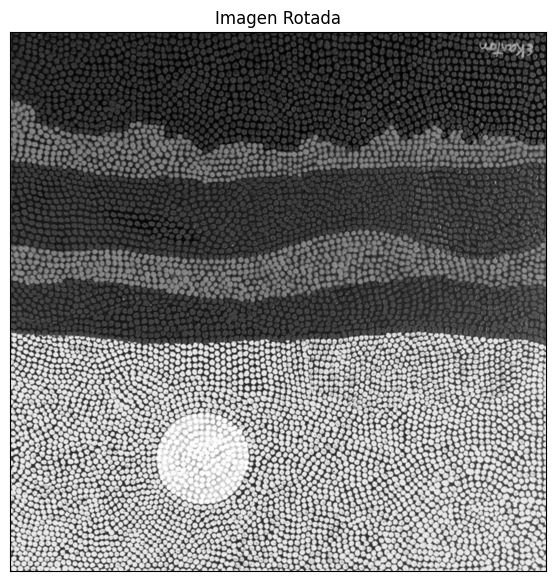

In [ ]:
ImagenGirada = transform.rotate(grayscale_image, 180)
imshow(ImagenGirada, 'Imagen Rotada')

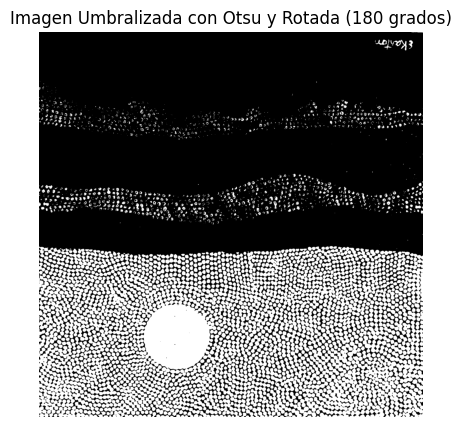

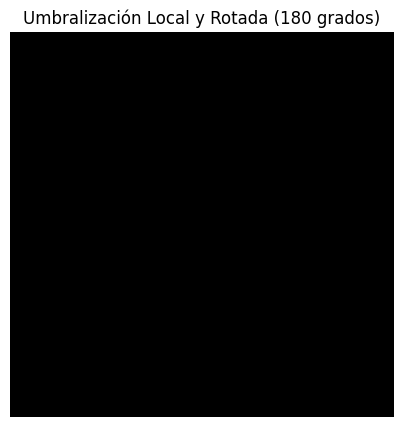

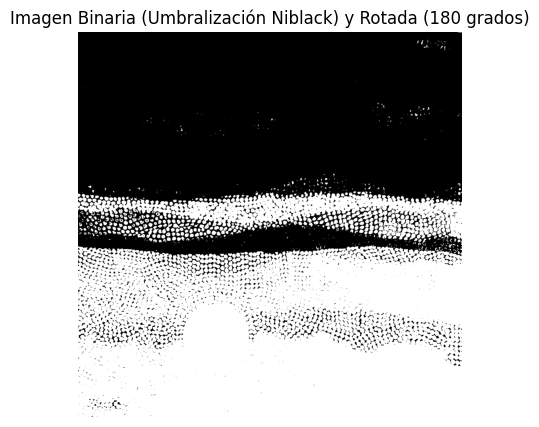

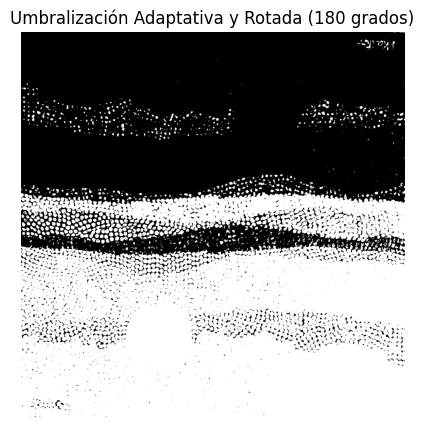

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, img_as_ubyte, util
from skimage.exposure import rescale_intensity

# Define una función para aplicar umbralización y rotación
def apply_threshold_and_rotation(image, threshold_method, rotation_angle):
    # Aplica el método de umbralización
    if threshold_method == 'otsu':
        thresh = filters.threshold_otsu(image)
    elif threshold_method == 'local':
        block_size = 35  # Tamaño del bloque
        binary_image = filters.threshold_local(image, block_size, offset=10)
    elif threshold_method == 'niblack':
        window_size = 35  # Tamaño de la ventana
        binary_image = filters.threshold_niblack(image, window_size=window_size)
    elif threshold_method == 'sauvola':
        thresholded_image = filters.threshold_sauvola(image)

    # Realiza la rotación de 180 grados
    rotated_image = np.rot90(image, 2)

    # Muestra la imagen umbralizada y rotada
    plt.figure(figsize=(10, 5))

    if threshold_method == 'otsu':
        plt.title(f'Imagen Umbralizada con Otsu y Rotada ({rotation_angle} grados)')
        plt.imshow(thresh < rotated_image, cmap='gray')
    elif threshold_method == 'local':
        plt.title(f'Umbralización Local y Rotada ({rotation_angle} grados)')
        plt.imshow(binary_image < rotated_image, cmap='gray')
    elif threshold_method == 'niblack':
        plt.title(f'Imagen Binaria (Umbralización Niblack) y Rotada ({rotation_angle} grados)')
        plt.imshow(binary_image < rotated_image, cmap='gray')
    elif threshold_method == 'sauvola':
        plt.title(f'Umbralización Adaptativa y Rotada ({rotation_angle} grados)')
        plt.imshow(thresholded_image < rotated_image, cmap='gray')

    plt.axis('off')
    plt.show()

# Cargar la imagen en escala de grises desde una URL o tu computadora
image_url = "Pintura_Puntos.jpg"  # Cambia esto a la URL de tu imagen o la ruta de tu imagen local
image = io.imread(image_url, as_gray=True)  # Para cargar desde una URL
# Si estás cargando desde tu computadora, puedes usar io.imread("nombre_de_la_imagen.jpg")

# Llama a la función para aplicar umbralización y rotación para diferentes métodos
apply_threshold_and_rotation(image, 'otsu', 180)
apply_threshold_and_rotation(image, 'local', 180)
apply_threshold_and_rotation(image, 'niblack', 180)
apply_threshold_and_rotation(image, 'sauvola', 180)


# Morfología Matemática

Como se puede apreciar en la imagen hay varios elementos imperfectos:
- Hay círculos que están en contacto con otros círculos
- Hay círculos que están huecos por centro
- Hay círculos que no están cerrados del todo

Mediante el uso de morfología matemática (concretamente los cuatro operadores visto en clase) y los posibles elementos estructurales existentes, se pide:
- Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.
- ¿Qué operador o secuencia de operadores elegiríais?
- Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen _complementaria_, ¿qué conclusiones sacas de esto?


**Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.**

El elemento estructural más adecuado depende del objetivo de procesamiento de la imagen. Para la eliminación de ruido y mejora de bordes, la secuencia 'disk' de tamaño 5 tiene capacidad para preservar la forma general de los objetos y eliminar detalles pequeños.

**¿Qué operador o secuencia de operadores elegiríais?**

Para mejorar los bordes y eliminar el ruido en una imagen, se puede utilizar la secuencia "closing". Asimismo, la secuencia 'disk' también es una buena elección.

**Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen complementaria, ¿qué conclusiones sacas de esto?**

Al repetir el proceso para la imagen complementaria, se puede observar que el mismo operador y elemento estructural pueden funcionar bien, pero los resultados pueden variar según la naturaleza de la imagen.


**Código**

Mediante la umbralización de la imagen por los métodos realizados se ha observado que el método Niblack es el idóneo.

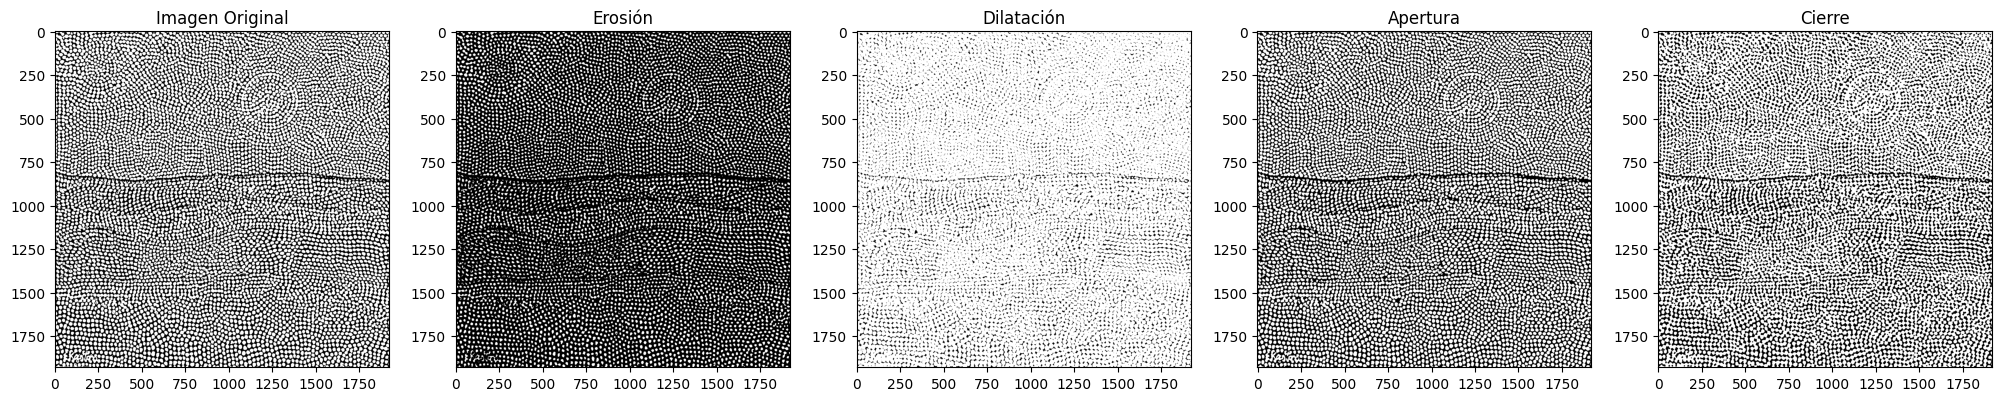

In [ ]:
from skimage import io, morphology
import matplotlib.pyplot as plt


# Aplicar una operación de erosión
imagen_eroded = morphology.erosion(niblack, morphology.disk(3))

# Aplicar una operación de dilatación
imagen_dilated = morphology.dilation(niblack, morphology.disk(3))

# Aplicar una operación de apertura
imagen_opened = morphology.opening(niblack, morphology.disk(3))

# Aplicar una operación de cierre
imagen_closed = morphology.closing(niblack, morphology.disk(3))

# Mostrar las imágenes resultantes
plt.figure(figsize=(25, 6))

plt.subplot(151)
plt.imshow(niblack, cmap='gray')
plt.title('Imagen Original')

plt.subplot(152)
plt.imshow(imagen_eroded, cmap='gray')
plt.title('Erosión')

plt.subplot(153)
plt.imshow(imagen_dilated, cmap='gray')
plt.title('Dilatación')

plt.subplot(154)
plt.imshow(imagen_opened, cmap='gray')
plt.title('Apertura')

plt.subplot(155)
plt.imshow(imagen_closed, cmap='gray')
plt.title('Cierre')

plt.show()

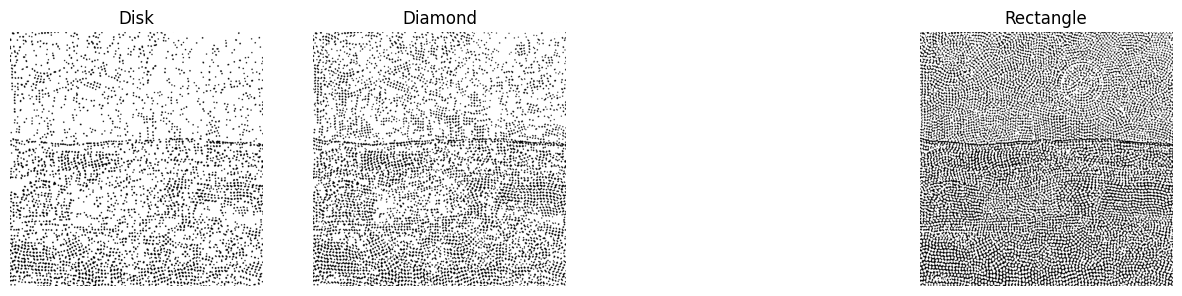

In [ ]:
from skimage import io, morphology
import matplotlib.pyplot as plt

# Elemento estructural: disk
disk_element = morphology.disk(5)
result_disk = morphology.closing(ImagenBuena, disk_element)

# Elemento estructural: diamond
diamond_element = morphology.diamond(5)
result_diamond = morphology.closing(ImagenBuena, diamond_element)

# Elemento estructural: rectangle
rectangle_element = morphology.rectangle(5, 5)
result_rectangle = morphology.closing(ImagenBuena, rectangle_element)

# Mostrar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Disk')
plt.imshow(result_disk, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Diamond')
plt.imshow(result_diamond, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Rectangle')
plt.imshow(result_rectangle, cmap='gray')
plt.axis('off')

plt.show()

# Contando círculos

Haciendo uso de las funcionalidades cargadas al principio, se pide hacer una función que:
- Reciba como parámetro una imagen binaria
- Compruebe que es binaria y si no es binaria, deberá imprimir por pantalla que no es binaria
- Cuente el número de círculos dentro de la imagen.
- Devuelva (return) dicho número de círculos.

Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?

**Código**

Número de círculos: 4184


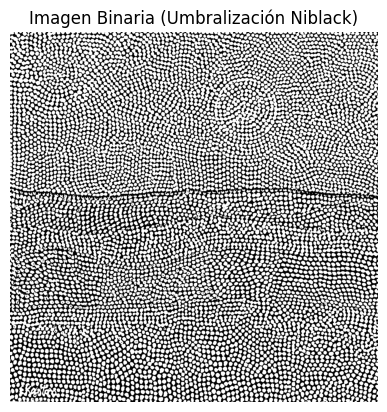

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

def count_circles(imagen_binaria):
    # Comprobar que la imagen es binaria
    if len(np.unique(imagen_binaria)) != 2:
        print("La imagen no es binaria.")
        return None

    # Etiquetar los objetos conectados en la imagen binaria
    labeled_image = measure.label(imagen_binaria, connectivity=2)

    # Calcular las propiedades de los objetos etiquetados
    region_props = measure.regionprops(labeled_image)

    # Inicializar contador de círculos
    num_circulos = 0

    # Umbral de área mínima para considerar un objeto como círculo (ajustar según sea necesario)
    min_area_threshold = 50

    # Contar círculos y eliminar pequeños puntos o ruido
    for prop in region_props:
        if prop.area > min_area_threshold:
            num_circulos += 1

    return num_circulos

# Cargar la imagen generada por threshold_niblack
image_url = "Pintura_Puntos.jpg"  # Cambia esto a la URL de tu imagen o la ruta de tu imagen local
image = io.imread(image_url)  # Para cargar desde una URL

# Convierte la imagen a escala de grises si no lo está
if len(image.shape) == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Aplicar umbralización local (threshold_niblack)
window_size = 35  # Tamaño de la ventana
binary_image = gray_image > filters.threshold_niblack(gray_image, window_size=window_size)

# Llama a la función para contar círculos
num_circulos = count_circles(binary_image)

# Imprime el resultado
print("Número de círculos:", num_circulos)

# Mostrar la imagen binaria
plt.imshow(binary_image, cmap='gray')
plt.title("Imagen Binaria (Umbralización Niblack)")
plt.axis('off')
plt.show()


**Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?**

Para asegurar que no se tienen en cuenta posibles errores en la umbralización, como pequeños puntos o se podría usar:
- Filtrado de Ruido Pre-Umbralización
- Ajuste del Tamaño Mínimo
- Post-Procesamiento
- Validación
- Experimentación con otros Métodos de Umbralización además del Niblack

# (Bonus) Automatizamos el proceso de extracción

Esta sección no es obligatoria pero la pongo para aquellos que quieran saber "¿y ahora qué se haría?".

Lo que hemos hecho hasta ahora es:
- Encontrar un método de umbralización adecuado (que tiene unos parámetros que ya hemos fijado - según nuestro criterio)
- Hemos utilizado unos métodos de morfología matemática, también con sus parámetros

Es decir, tenemos varios parámetros y tenemos una función que nos dice cuál es el número de puntos dada una imagen. Variando dichos parámetros, variará también el número de puntos, pero no parece haber una relación directa.

También no hay que olvidar que desconocemos el número de puntos (nunca se ha dicho, aunque siempre puedes contarlos), por lo que no podemos seguir un proceso de aprendizaje supervisado (tipo descenso del gradiente sobre los parámetros anteriores para encontrar el mejor resultado).

Pero lo que sí podemos hacer es iterar el valor de los parámetros para alcanzar un máximo de puntos (asumiendo que dicho máximo corresponderá con el mejor resultado). Esto suele hacerse cuando no sabemos exáctamente el resultado que esperamos.

En definitiva, ahora se buscaría realizar un proceso iterativo para encontrar el valor máximo del número de puntos. Para ello haría falta:
- Crear una función que englobe todos los procesos anteriores (umbralización, morfología matemática, etc...) y que tome como parámetro de entrada una imagen en color y devuelva el número de puntos.
- Crear los intervalos donde variarán todos los parámetros que queremos ir modificando
- Crear un proceso iterativo que vaya recorriendo todas las combinaciones de elementos (se recomienda el uso de `product` del paquete `itertools`).
- Una vez terminado el proceso quedarnos con la combinación de paráteros ganadora y el resultado del número de puntos.

Podría decirse que esa combinación de parámetros es la mejor.


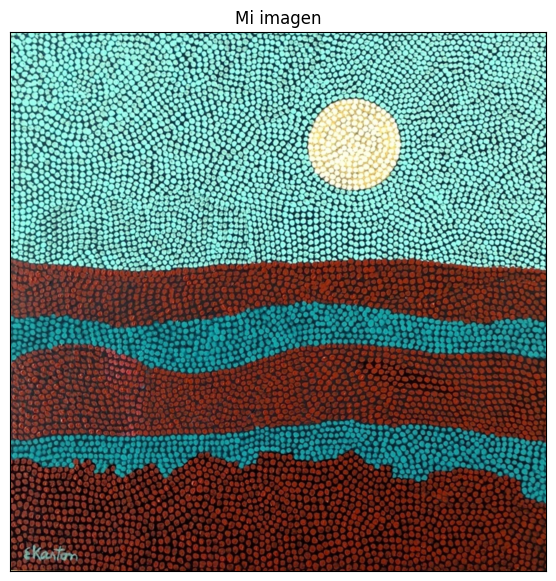

Mejor combinación de parámetros: (25, 50, 'niblack')
Número máximo de círculos detectados: 4473


In [ ]:
import itertools
from skimage import io, color, filters, morphology, measure

# Cargar la imagen
image_path = imread('Pintura_Puntos.jpg')
imshow(image_path,"Mi imagen")


# Definir los posibles valores de los parámetros
possible_window_sizes = [25, 35, 45]
possible_min_area_thresholds = [50, 100, 150]
possible_threshold_methods = ['otsu', 'niblack', 'sauvola']
parameter_combinations = list(itertools.product(possible_window_sizes, possible_min_area_thresholds, possible_threshold_methods))
def count_circles_with_parameters(image, window_size, min_area_threshold, threshold_method):
    # Convierte la imagen a escala de grises si no lo está
    if len(image.shape) == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar umbralización local con los parámetros dados
    if threshold_method == 'otsu':
        binary_image = gray_image > filters.threshold_otsu(gray_image)
    elif threshold_method == 'niblack':
        binary_image = gray_image > filters.threshold_niblack(gray_image, window_size=window_size)
    elif threshold_method == 'sauvola':
        binary_image = gray_image > filters.threshold_sauvola(gray_image)

    # Contar círculos y eliminar pequeños puntos o ruido
    labeled_image = measure.label(binary_image, connectivity=2)
    region_props = measure.regionprops(labeled_image)
    num_circulos = 0
    for prop in region_props:
        if prop.area > min_area_threshold:
            num_circulos += 1

    return num_circulos
best_num_circles = 0
best_parameters = None

for window_size, min_area_threshold, threshold_method in parameter_combinations:
    num_circles = count_circles_with_parameters(image_path, window_size, min_area_threshold, threshold_method)
    if num_circles > best_num_circles:
        best_num_circles = num_circles
        best_parameters = (window_size, min_area_threshold, threshold_method)

print("Mejor combinación de parámetros:", best_parameters)
print("Número máximo de círculos detectados:", best_num_circles)

La combinación de parámetros (25, 50, 'niblack') se considera la mejor ya que logra detectar el máximo número de círculos (4473) en la imagen dada.

Fernando Pocino Martín 4ºIngeniería Biomédica